# Prostate Segmentation

(Make sure HDF5 files contain dictionary with keys as "names","data" and "mask") <br>
Expected size of the volume - 96x96x64 centered cropped after resampling it to (1x1x1 mm) <br>
Recommended batch size of 8-10 to fit the GPU memory of 12 GB <br>
modelcheckpoint saved in the Data folder

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms
import torchvision.models as models
import h5py
from torch.autograd import Variable
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt 
from pytorchtools import EarlyStopping
from random import randint
from segUtil import Modified3DUNet,ProstateDatasetHDF5,DiceLoss

### Reading train and val hdf5 files 

In [2]:
trainfilename = r"Data/train.h5"
valfilename = r"Data/val.h5"

train = h5py.File(trainfilename,libver='latest')
val = h5py.File(valfilename,libver='latest')

trainnames = np.array(train["names"])
valnames = np.array(val["names"])

train.close()
val.close()

### Prostate Dataset class

In [3]:
data_train = ProstateDatasetHDF5(trainfilename)
data_val = ProstateDatasetHDF5(valfilename)

### Creating DataLoader for training and validation data 

In [4]:
batch_size = 10
num_workers = 8

trainLoader = torch.utils.data.DataLoader(dataset=data_train,batch_size = batch_size,num_workers = num_workers,shuffle = True)
valLoader = torch.utils.data.DataLoader(dataset=data_val,batch_size = batch_size,num_workers = num_workers,shuffle = False) 

dataLoader = {}
dataLoader['train'] = trainLoader
dataLoader['val'] = valLoader

### Visualizing few images

IMPRODBP_103_A3
0
255


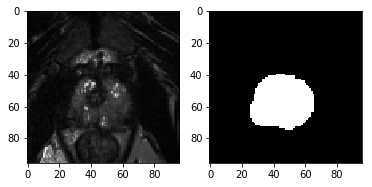

IMPRODBP_103_A4
0
255


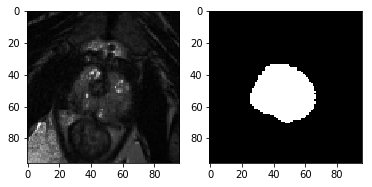

IMPRODBP_103_A5
0
255


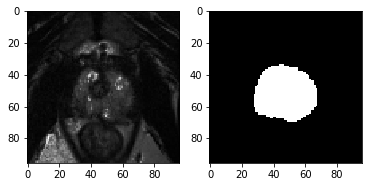

In [5]:
def visualizeImagesTorch(data_train,samp):
    for i in range(3):     
        timg,mask,lb = data_train.__getitem__(i + samp)        
        timg = np.asarray(timg)
        
        print(lb)
        print(timg.min())
        print(timg.max())

        plt.subplot(121)
        plt.imshow(timg[0,20,:,:],cmap = 'gray',vmin = 0, vmax = 255)
        plt.subplot(122)
        plt.imshow(mask[0,20,:,:],cmap = 'gray',vmin = 0, vmax = 1)
        plt.show()
        
visualizeImagesTorch(dataLoader['train'].dataset,50)

### Defining UNet model

In [6]:
model = Modified3DUNet(1,2)
device = torch.device("cuda:0")
model.to(device)

print(device)

cuda:0


### Defining optimizer and loss function 

In [8]:
num_epochs = 200
learning_rate = 1e-4
weightdecay = 1e-3

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weightdecay)

print(len(dataLoader['train']))
print(len(dataLoader['val']))

281
6


### Running the model (make sure specify proper patience and model name to save the model with early stopping criteria)

In [ ]:
patience = 10 
early_stopping = EarlyStopping(patience=patience, verbose=True)
modelname = r"unet"

0
100
200
Epoch : 0, Phase : train, Loss : 0.0810023546219
0
                 Epoch : 0, Phase : val, Loss : 0.124266088009


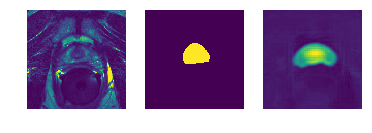

Validation loss decreased (inf --> 0.124266088009).  Saving model ...
0
100
200
Epoch : 1, Phase : train, Loss : 0.0742230564356
0
                 Epoch : 1, Phase : val, Loss : 0.123695999384


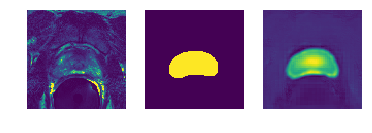

Validation loss decreased (0.124266088009 --> 0.123695999384).  Saving model ...
0
100
200
Epoch : 2, Phase : train, Loss : 0.0689295306802
0
                 Epoch : 2, Phase : val, Loss : 0.125287011266


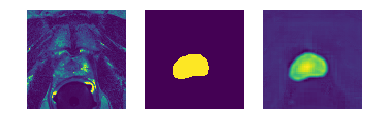

EarlyStopping counter: 1 out of 10
0
100
200
Epoch : 3, Phase : train, Loss : 0.0638813152909
0
                 Epoch : 3, Phase : val, Loss : 0.118734717369


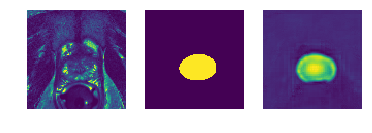

Validation loss decreased (0.123695999384 --> 0.118734717369).  Saving model ...
0
100
200
Epoch : 4, Phase : train, Loss : 0.0591441877186
0
                 Epoch : 4, Phase : val, Loss : 0.118631333113


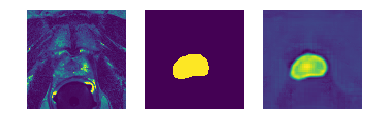

Validation loss decreased (0.118734717369 --> 0.118631333113).  Saving model ...
0
100
200
Epoch : 5, Phase : train, Loss : 0.0573699362576
0
                 Epoch : 5, Phase : val, Loss : 0.120275996625


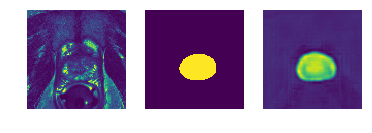

EarlyStopping counter: 1 out of 10
0
100
200
Epoch : 6, Phase : train, Loss : 0.0546765141189
0
                 Epoch : 6, Phase : val, Loss : 0.119006894529


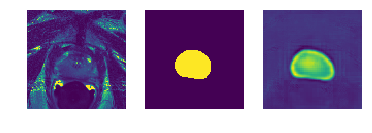

EarlyStopping counter: 2 out of 10
0
100
200
Epoch : 7, Phase : train, Loss : 0.052043247968
0
                 Epoch : 7, Phase : val, Loss : 0.119611240923


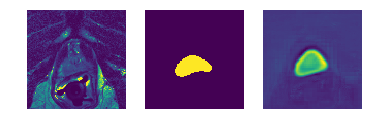

EarlyStopping counter: 3 out of 10
0
100
200
Epoch : 8, Phase : train, Loss : 0.0502353124321
0
                 Epoch : 8, Phase : val, Loss : 0.120373271406


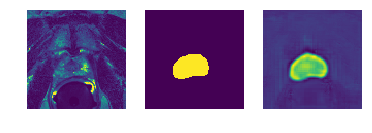

EarlyStopping counter: 4 out of 10
0
100
200
Epoch : 9, Phase : train, Loss : 0.0489256307483
0
                 Epoch : 9, Phase : val, Loss : 0.116909235716


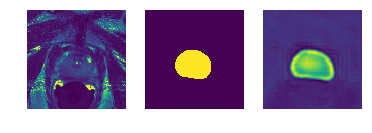

Validation loss decreased (0.118631333113 --> 0.116909235716).  Saving model ...
0
100
200
Epoch : 10, Phase : train, Loss : 0.0472050011158
0
                 Epoch : 10, Phase : val, Loss : 0.117801316082


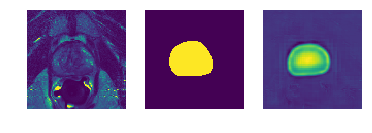

EarlyStopping counter: 1 out of 10
0
100
200
Epoch : 11, Phase : train, Loss : 0.0468251779675
0
                 Epoch : 11, Phase : val, Loss : 0.120126754045


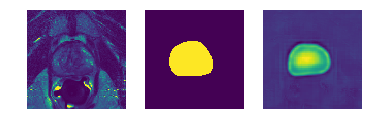

EarlyStopping counter: 2 out of 10
0
100
200
Epoch : 12, Phase : train, Loss : 0.0447960831225
0
                 Epoch : 12, Phase : val, Loss : 0.116910673678


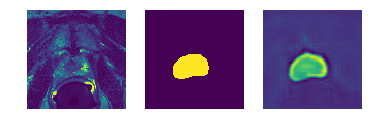

EarlyStopping counter: 3 out of 10
0
100
200
Epoch : 13, Phase : train, Loss : 0.0441487953067
0
                 Epoch : 13, Phase : val, Loss : 0.116383552551


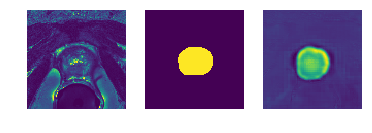

Validation loss decreased (0.116909235716 --> 0.116383552551).  Saving model ...
0
100
200
Epoch : 14, Phase : train, Loss : 0.0429636910558
0
                 Epoch : 14, Phase : val, Loss : 0.116535119712


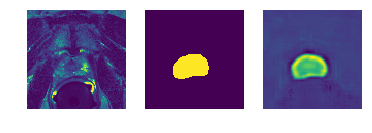

EarlyStopping counter: 1 out of 10
0
100
200
Epoch : 15, Phase : train, Loss : 0.0421488396823
0
                 Epoch : 15, Phase : val, Loss : 0.116308994591


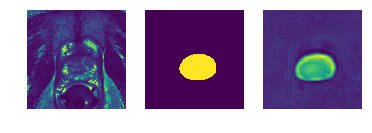

Validation loss decreased (0.116383552551 --> 0.116308994591).  Saving model ...
0
100
200
Epoch : 16, Phase : train, Loss : 0.0417798757553
0
                 Epoch : 16, Phase : val, Loss : 0.117836207151


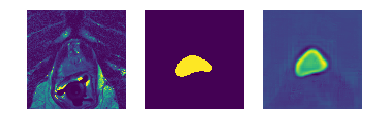

EarlyStopping counter: 1 out of 10
0
100
200
Epoch : 17, Phase : train, Loss : 0.0405519492924
0
                 Epoch : 17, Phase : val, Loss : 0.114575028419


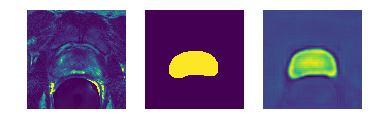

Validation loss decreased (0.116308994591 --> 0.114575028419).  Saving model ...
0
100
200
Epoch : 18, Phase : train, Loss : 0.0393846668303
0
                 Epoch : 18, Phase : val, Loss : 0.116008229554


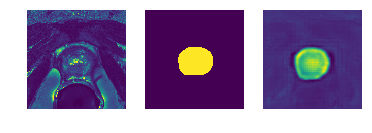

EarlyStopping counter: 1 out of 10
0
100
200
Epoch : 19, Phase : train, Loss : 0.0381383597851
0
                 Epoch : 19, Phase : val, Loss : 0.116021327674


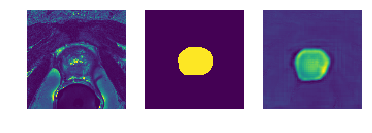

EarlyStopping counter: 2 out of 10
0
100
200
Epoch : 20, Phase : train, Loss : 0.0374865941703
0
                 Epoch : 20, Phase : val, Loss : 0.116684101522


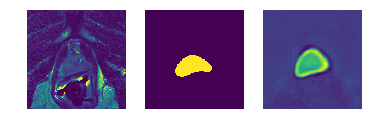

EarlyStopping counter: 3 out of 10
0
100
200
Epoch : 21, Phase : train, Loss : 0.0384219549596
0
                 Epoch : 21, Phase : val, Loss : 0.114436559379


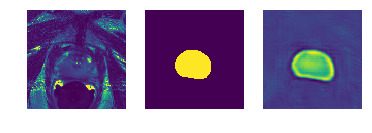

Validation loss decreased (0.114575028419 --> 0.114436559379).  Saving model ...
0
100
200
Epoch : 22, Phase : train, Loss : 0.0362451821566
0
                 Epoch : 22, Phase : val, Loss : 0.112919747829


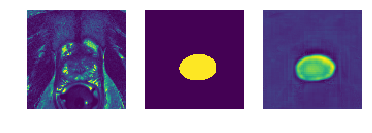

Validation loss decreased (0.114436559379 --> 0.112919747829).  Saving model ...
0
100
200
Epoch : 23, Phase : train, Loss : 0.0361753255129
0
                 Epoch : 23, Phase : val, Loss : 0.113096930087


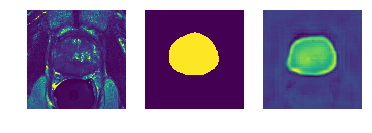

EarlyStopping counter: 1 out of 10
0
100
200
Epoch : 24, Phase : train, Loss : 0.0357771143317
0
                 Epoch : 24, Phase : val, Loss : 0.113876931369


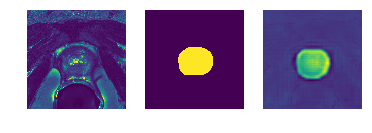

EarlyStopping counter: 2 out of 10
0
100
200
Epoch : 25, Phase : train, Loss : 0.0354982353747
0
                 Epoch : 25, Phase : val, Loss : 0.111874960363


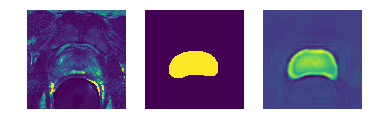

Validation loss decreased (0.112919747829 --> 0.111874960363).  Saving model ...
0
100
200
Epoch : 26, Phase : train, Loss : 0.0353080444038
0
                 Epoch : 26, Phase : val, Loss : 0.113079927862


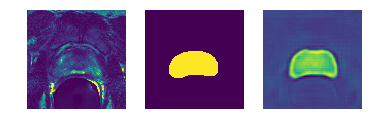

EarlyStopping counter: 1 out of 10
0
100
200
Epoch : 27, Phase : train, Loss : 0.0340927578509
0
                 Epoch : 27, Phase : val, Loss : 0.112357527018


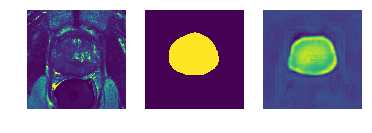

EarlyStopping counter: 2 out of 10
0
100
200
Epoch : 28, Phase : train, Loss : 0.0339339934289
0
                 Epoch : 28, Phase : val, Loss : 0.113230168819


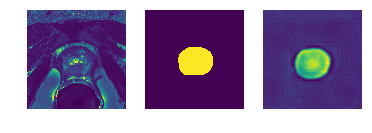

EarlyStopping counter: 3 out of 10
0
100
200
Epoch : 29, Phase : train, Loss : 0.0340672172606
0
                 Epoch : 29, Phase : val, Loss : 0.114560730755


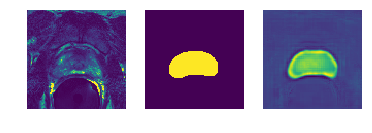

EarlyStopping counter: 4 out of 10
0
100
200
Epoch : 30, Phase : train, Loss : 0.0330822095275
0
                 Epoch : 30, Phase : val, Loss : 0.114540666342


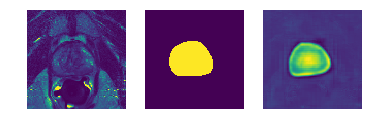

EarlyStopping counter: 5 out of 10
0
100
200
Epoch : 31, Phase : train, Loss : 0.0335472598672
0
                 Epoch : 31, Phase : val, Loss : 0.113870173693


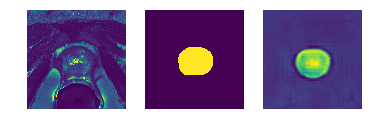

EarlyStopping counter: 6 out of 10
0
100
200
Epoch : 32, Phase : train, Loss : 0.032701741904
0
                 Epoch : 32, Phase : val, Loss : 0.113290183246


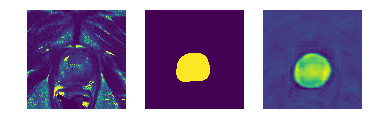

EarlyStopping counter: 7 out of 10
0
100
200
Epoch : 33, Phase : train, Loss : 0.0333547219634
0
                 Epoch : 33, Phase : val, Loss : 0.111768908799


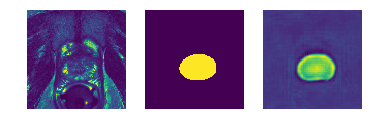

Validation loss decreased (0.111874960363 --> 0.111768908799).  Saving model ...
0
100
200
Epoch : 34, Phase : train, Loss : 0.0336506329477
0
                 Epoch : 34, Phase : val, Loss : 0.113223843277


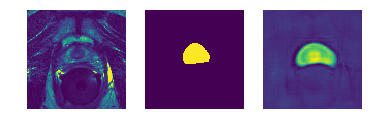

EarlyStopping counter: 1 out of 10
0
100
200
Epoch : 35, Phase : train, Loss : 0.032676961273
0
                 Epoch : 35, Phase : val, Loss : 0.111981995404


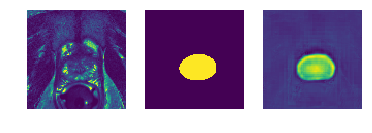

EarlyStopping counter: 2 out of 10
0
100
200
Epoch : 36, Phase : train, Loss : 0.0313528738916
0
                 Epoch : 36, Phase : val, Loss : 0.113389112055


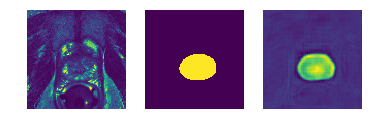

EarlyStopping counter: 3 out of 10
0
100
200
Epoch : 37, Phase : train, Loss : 0.0316537693143
0
                 Epoch : 37, Phase : val, Loss : 0.113748796284


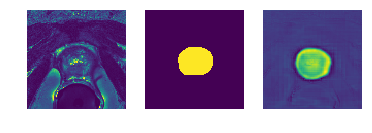

EarlyStopping counter: 4 out of 10
0
100
200
Epoch : 38, Phase : train, Loss : 0.0316331461072
0
                 Epoch : 38, Phase : val, Loss : 0.112711988389


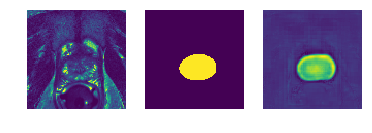

EarlyStopping counter: 5 out of 10
0
100
200
Epoch : 39, Phase : train, Loss : 0.0320268683136
0
                 Epoch : 39, Phase : val, Loss : 0.114176787436


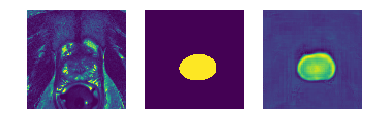

EarlyStopping counter: 6 out of 10
0
100
200
Epoch : 40, Phase : train, Loss : 0.0308733731508
0
                 Epoch : 40, Phase : val, Loss : 0.11352609843


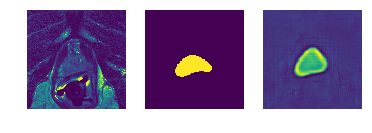

EarlyStopping counter: 7 out of 10
0
100
200
Epoch : 41, Phase : train, Loss : 0.031010909006
0
                 Epoch : 41, Phase : val, Loss : 0.11434892565


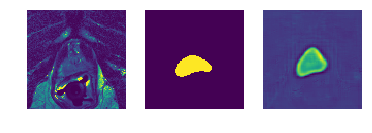

EarlyStopping counter: 8 out of 10
0
100
200
Epoch : 42, Phase : train, Loss : 0.0318096168339
0
                 Epoch : 42, Phase : val, Loss : 0.111442826688


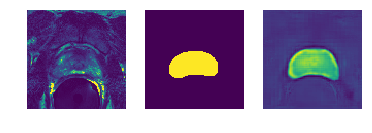

Validation loss decreased (0.111768908799 --> 0.111442826688).  Saving model ...
0
100
200
Epoch : 43, Phase : train, Loss : 0.0309709031135
0
                 Epoch : 43, Phase : val, Loss : 0.11090221256


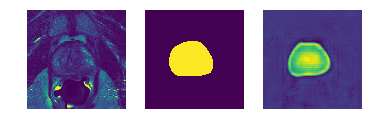

Validation loss decreased (0.111442826688 --> 0.11090221256).  Saving model ...
0
100
200
Epoch : 44, Phase : train, Loss : 0.0301962718368
0
                 Epoch : 44, Phase : val, Loss : 0.11575409025


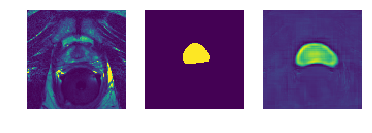

EarlyStopping counter: 1 out of 10
0
100
200
Epoch : 45, Phase : train, Loss : 0.0307736173272
0
                 Epoch : 45, Phase : val, Loss : 0.114265076816


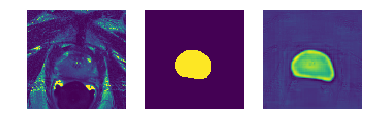

EarlyStopping counter: 2 out of 10
0
100
200
Epoch : 46, Phase : train, Loss : 0.0303900949657
0
                 Epoch : 46, Phase : val, Loss : 0.112382531166


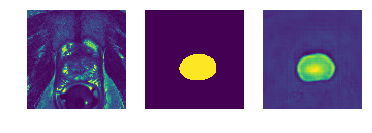

EarlyStopping counter: 3 out of 10
0
100
200
Epoch : 47, Phase : train, Loss : 0.0309806913137
0
                 Epoch : 47, Phase : val, Loss : 0.110618717968


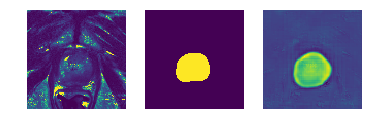

Validation loss decreased (0.11090221256 --> 0.110618717968).  Saving model ...
0
100
200
Epoch : 48, Phase : train, Loss : 0.0305099971592
0
                 Epoch : 48, Phase : val, Loss : 0.111286588013


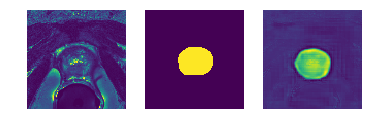

EarlyStopping counter: 1 out of 10
0
100
200
Epoch : 49, Phase : train, Loss : 0.0295488256961
0
                 Epoch : 49, Phase : val, Loss : 0.110877513885


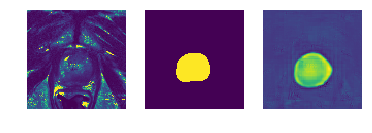

EarlyStopping counter: 2 out of 10
0
100
200
Epoch : 50, Phase : train, Loss : 0.0298826284707
0
                 Epoch : 50, Phase : val, Loss : 0.11113525182


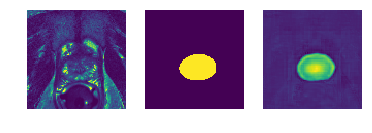

EarlyStopping counter: 3 out of 10
0
100
200
Epoch : 51, Phase : train, Loss : 0.0296979472041
0
                 Epoch : 51, Phase : val, Loss : 0.112507678568


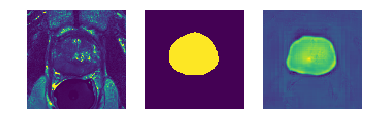

EarlyStopping counter: 4 out of 10
0
100
200
Epoch : 52, Phase : train, Loss : 0.0299576763064
0
                 Epoch : 52, Phase : val, Loss : 0.111087195575


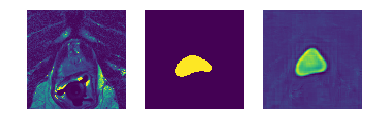

EarlyStopping counter: 5 out of 10
0
100
200
Epoch : 53, Phase : train, Loss : 0.0292927585542
0
                 Epoch : 53, Phase : val, Loss : 0.109451651573


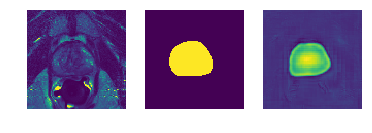

Validation loss decreased (0.110618717968 --> 0.109451651573).  Saving model ...
0
100
200
Epoch : 54, Phase : train, Loss : 0.0307798217982
0
                 Epoch : 54, Phase : val, Loss : 0.11642036587


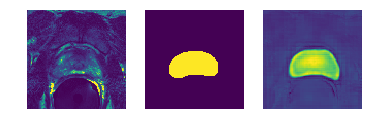

EarlyStopping counter: 1 out of 10
0
100
200
Epoch : 55, Phase : train, Loss : 0.029811186716
0
                 Epoch : 55, Phase : val, Loss : 0.109412640333


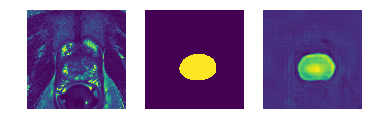

Validation loss decreased (0.109451651573 --> 0.109412640333).  Saving model ...
0
100
200
Epoch : 56, Phase : train, Loss : 0.0285821557045
0
                 Epoch : 56, Phase : val, Loss : 0.113448806107


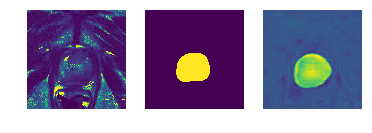

EarlyStopping counter: 1 out of 10
0
100
200
Epoch : 57, Phase : train, Loss : 0.029556658119
0
                 Epoch : 57, Phase : val, Loss : 0.112242765725


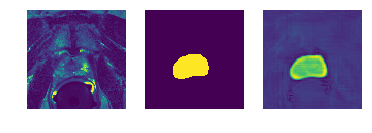

EarlyStopping counter: 2 out of 10
0
100
200
Epoch : 58, Phase : train, Loss : 0.0290830694139
0
                 Epoch : 58, Phase : val, Loss : 0.110412724316


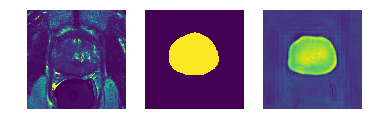

EarlyStopping counter: 3 out of 10
0
100
200
Epoch : 59, Phase : train, Loss : 0.0294055975974
0
                 Epoch : 59, Phase : val, Loss : 0.112680405378


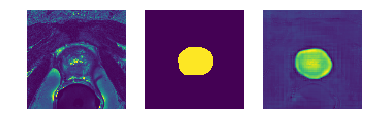

EarlyStopping counter: 4 out of 10
0
100
200
Epoch : 60, Phase : train, Loss : 0.0323284007609
0
                 Epoch : 60, Phase : val, Loss : 0.109769918025


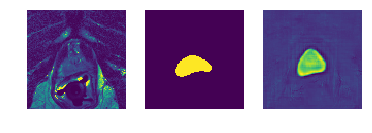

EarlyStopping counter: 5 out of 10
0
100
200
Epoch : 61, Phase : train, Loss : 0.0288281962276
0
                 Epoch : 61, Phase : val, Loss : 0.109360568225


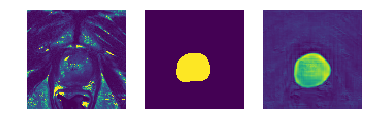

Validation loss decreased (0.109412640333 --> 0.109360568225).  Saving model ...
0
100
200
Epoch : 62, Phase : train, Loss : 0.0283874459565
0
                 Epoch : 62, Phase : val, Loss : 0.11106017977


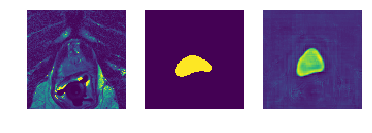

EarlyStopping counter: 1 out of 10
0
100
200
Epoch : 63, Phase : train, Loss : 0.0285988673568
0
                 Epoch : 63, Phase : val, Loss : 0.111266583204


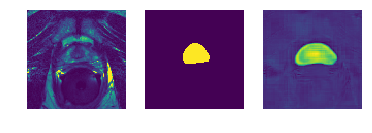

EarlyStopping counter: 2 out of 10
0
100
200
Epoch : 64, Phase : train, Loss : 0.0287753343582
0
                 Epoch : 64, Phase : val, Loss : 0.111403815448


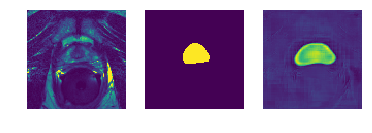

EarlyStopping counter: 3 out of 10
0
100
200
Epoch : 65, Phase : train, Loss : 0.0284097325057
0
                 Epoch : 65, Phase : val, Loss : 0.110462360084


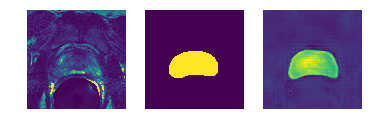

EarlyStopping counter: 4 out of 10
0
100
200
Epoch : 66, Phase : train, Loss : 0.028732938692
0
                 Epoch : 66, Phase : val, Loss : 0.11176559329


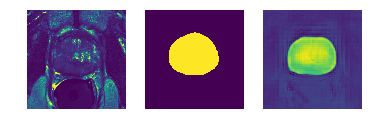

EarlyStopping counter: 5 out of 10
0
100
200
Epoch : 67, Phase : train, Loss : 0.0286666210741
0
                 Epoch : 67, Phase : val, Loss : 0.109948195517


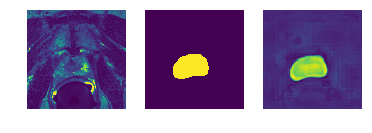

EarlyStopping counter: 6 out of 10
0
100
200
Epoch : 68, Phase : train, Loss : 0.0288453903049
0
                 Epoch : 68, Phase : val, Loss : 0.112959913909


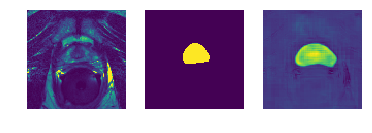

EarlyStopping counter: 7 out of 10
0
100
200
Epoch : 69, Phase : train, Loss : 0.0282851140946
0
                 Epoch : 69, Phase : val, Loss : 0.110313586891


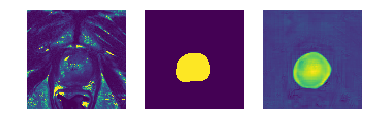

EarlyStopping counter: 8 out of 10
0
100
200
Epoch : 70, Phase : train, Loss : 0.0292537659407
0
                 Epoch : 70, Phase : val, Loss : 0.110814809799


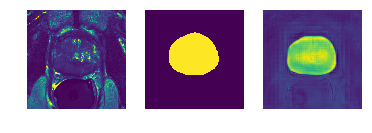

EarlyStopping counter: 9 out of 10
0
100
200
Epoch : 71, Phase : train, Loss : 0.028257811442
0
                 Epoch : 71, Phase : val, Loss : 0.109682463109


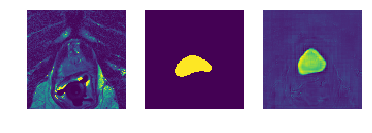

EarlyStopping counter: 10 out of 10
Early stopping


In [12]:
niter_total=len(dataLoader['train'].dataset)/batch_size

for epoch in range(num_epochs):
    
    for phase in ["train","val"]:
        if phase == 'train':
            model.train()  # Set model to training mode
        else:
            model.eval()   # Set model to evaluate mode


        loss_vector=[]
        for ii,(data,mask,name) in enumerate(dataLoader[phase]):
            
            if ii % 100 == 0 : 
                print(ii)
            
            data = Variable(data.float().cuda(device))
            mask = Variable(mask.float().cuda(device))

            out,seg_layer = model(data)
            label = mask.permute(0, 2, 3, 4, 1).contiguous().view(-1).cuda(device)
        
            loss = DiceLoss(out[:,1], label)

            loss_vector.append(loss.detach().data.cpu().numpy())

            if phase=="train":
                optimizer.zero_grad()

                loss.backward()
                optimizer.step()  

        loss_avg=np.mean(loss_vector)
        torch.cuda.empty_cache()
        

        if phase == 'train':
            print("Epoch : {}, Phase : {}, Loss : {}".format(epoch,phase,loss_avg))
        else:
            print("                 Epoch : {}, Phase : {}, Loss : {}".format(epoch,phase,loss_avg))

            
            ind = randint(0,data.shape[0]-1)
            
            img = seg_layer.cpu().detach().numpy()
            
            
            plt.subplot(131)
            plt.imshow(data[ind,0,20])
            plt.axis('off')
            plt.subplot(132)
            plt.imshow(mask[ind,0,20])
            plt.axis('off')
            plt.subplot(133)
            plt.imshow(img[ind,1,20])
            plt.axis('off')
            plt.show()
            
            
        if phase == 'val':
            early_stopping(loss_avg, model, modelname,parentfolder = None)

        if early_stopping.early_stop:
            print("Early stopping")
            break

    if early_stopping.early_stop:
        break